# 21. Merge Two Sorted Lists
Merge k sorted linked lists and return it as one sorted list. Analyze and describe its complexity.

<div class="alert alert-block alert-info">
Example:

Input:
[
  1->4->5,
  1->3->4,
  2->6
]

Output: 1->1->2->3->4->4->5->6
</div>
## Approach 1: Merge lists one by one

Convert merge k lists problem to merge 2 lists (k-1) times. 

Complexity Analysis

* Time complexity : O(kN) where k is the number of linked lists.
* Space complexity : O(1)

We can merge two sorted linked list in O(1) space. 

## Approach 2: Compare one by one

* Compare every k nodes (head of every linked list) and get the node with the smallest value.
* Extend the final sorted linked list with the selected nodes.

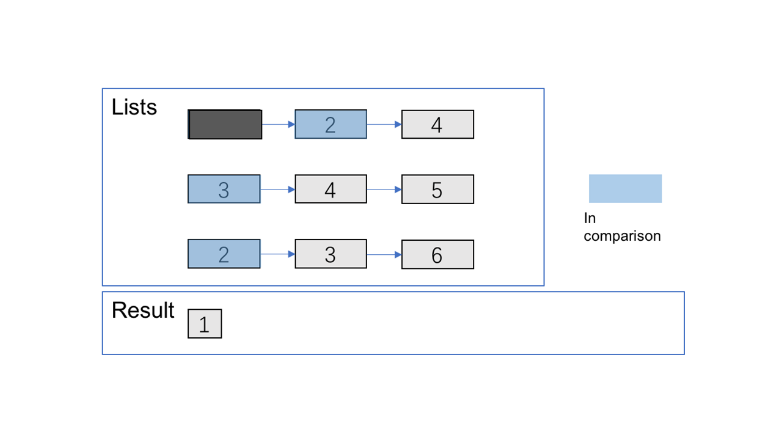

* Time complexity : O(kN) where k is the number of linked lists.

Almost every selection of node in final linked costs O(k) (k-1) times comparison. There are N nodes in the final linked list.
* Space complexity :

O(n) Creating a new linked list costs O(n) space.
O(1) It's not hard to apply in-place method - connect selected nodes instead of creating new nodes to fill the new linked list. 


## Approach 3: Optimize Approach 2 by Priority Queue

Compare every \text{k}k nodes (head of every linked list) and get the node with the smallest value.
Extend the final sorted linked list with the selected nodes.

K merge sort list and merging two sorted linked list of difference is that the number of operations in the ordered list, can thus follow the idea to implement the above code K merge sort list.

Here we can refer to the divide and conquer idea of ​​** merge sorting**, divide the K linked lists into two K/2 linked lists, process their merges, and then divide them down until they are divided into only one or two. The task of a linked list begins to merge.

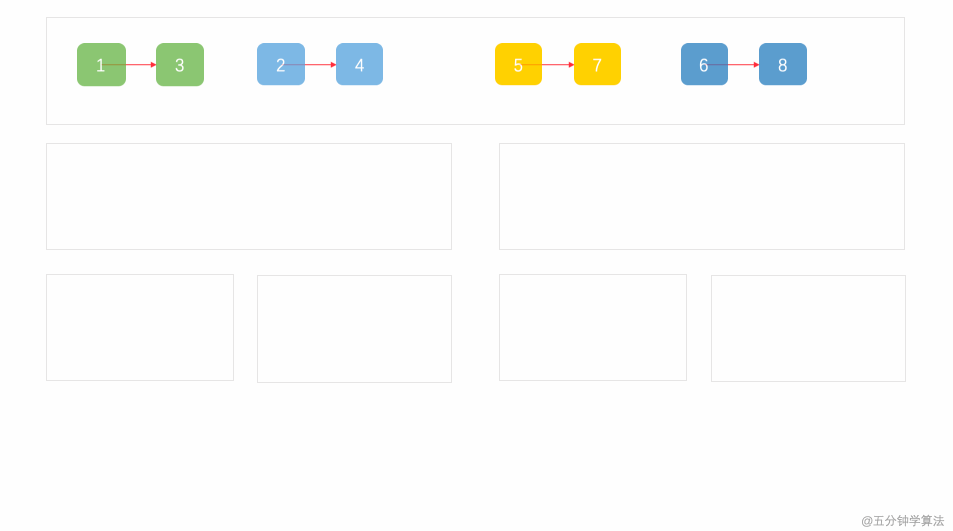
https://camo.githubusercontent.com/9f712b420ce1a29ba6e9742f0a77d3a187fa5a25/68747470733a2f2f757365722d676f6c642d63646e2e786974752e696f2f323031392f342f392f313639666638636262326338393166653f773d39353326683d35333126663d67696626733d313634363532

## Approach 4: Merge with Divide And Conquer
Intuition & Algorithm

This approach walks alongside the one above but is improved a lot. We don't need to traverse most nodes many times repeatedly

* Pair up k lists and merge each pair.

* After the first pairing, k lists are merged into k/2 lists with average 2N/k length, then k/4, k/8 and so on.

* Repeat this procedure until we get the final sorted linked list.

Thus, we'll traverse almost NN nodes per pairing and merging, and repeat this procedure about $\log_{2}{k}$ times.

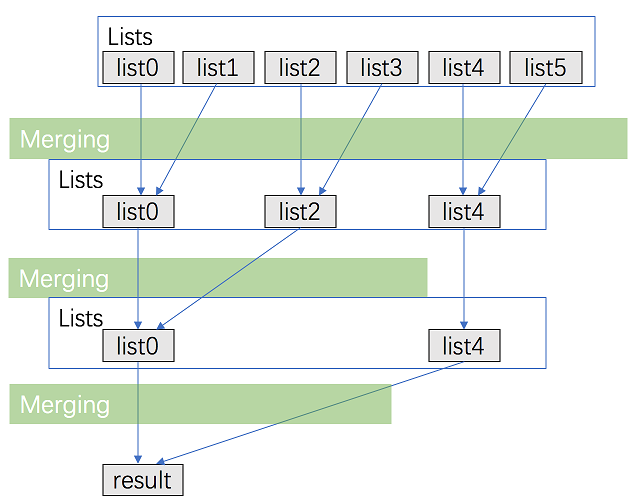

* Time complexity :  O(Nlogk) where k is the number of linked lists.

We can merge two sorted linked list in O(n) time where n is the total number of nodes in two lists.

* Space complexity : O(1)

We can merge two sorted linked lists in O(1) space.

In [ ]:
# Definition for singly-linked list.
class ListNode(object):
    def __init__(self, x):
        self.val = x
        self.next = None

from Queue import PriorityQueue
def mergeKLists(lists):
    """
    :type lists: List[ListNode]
    :rtype: ListNode
    """
    pq = PriorityQueue()
    dummy = ListNode(None)
    curr = dummy
    for node in lists:
        if node:
            pq.put((node.val,node))

    while pq.qsize()>0:
        val,node = pq.get()
        # create result list
        curr.next = ListNode(val)
        curr = curr.next

        node = node.next
        if node:
            pq.put((node.val,node))
    return dummy.next

In [ ]:
def mergeKLists(lists: List[ListNode]) -> ListNode:
    def merge2List(x,y,res):
        curr = res
        while x and y:
            if x.val < y.val:
                curr.next = x
                x = x.next
            else:
                curr.next = y
                y = y.next
            curr = curr.next
        curr.next = x if x else y
        return res.next

    if not lists:
        return None
    sentinel = ListNode(None)
    while len(lists) > 1:
        merged = []
        while len(lists)>1:
            merged.append(merge2List(lists.pop(),lists.pop(),sentinel))
        lists += merged
    return lists[0]
    